# **<font color=white> 06.Isolation Forest Code 실습**

[목적]
  - Isolation Forest Code 실습
  - Multivariate variable (다변량)일 때 사용
  - 각 Data마다 Score를 계산하여 Abnormal을 산출 할 수 있음
  
[Process]
  1. Define Data
  2. Modeling
  3. Plotting

In [2]:
!pip install pyod

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.7/147.7 KB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.0.7-py3-none-any.whl size=181101 sha256=f4df2cc12ba02cbaf6efda043b0df1a79da3df3ff82d3711fe6c4792cd13ba5d
  Stored in directory: /root/.cache/pip/wheels/f7/e2/c1/1c7fd8b261e72411f6509afb429c84532e40ddcd96074473f4
Successfully built pyod


In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from pyod.utils.data import generate_data, get_outliers_inliers
from sklearn.ensemble import IsolationForest

In [4]:
# Data Loading
X, Y = generate_data(behaviour='new', n_features=10, 
                     train_only=True,
                     contamination=0.1,
                     random_state=2023)

In [5]:
# Naming for columns
col_list = []
for i in range(X.shape[1]):
    a = 'X{}'.format(i+1)
    col_list.append(a)

In [6]:
# Columns Name
col_list

['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10']

In [7]:
# Make DF
df = pd.DataFrame(X, columns = col_list)
df['Y'] = Y

In [8]:
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Y
0,8.147125,6.595282,6.353558,6.653506,8.134808,7.426514,6.474067,7.230509,7.457418,6.916700,0.0
1,6.872178,6.596448,7.349710,7.097543,7.024347,6.615302,6.753538,7.218030,7.819604,6.563562,0.0
2,6.910465,5.856827,6.495701,6.598612,8.042650,6.205240,7.024534,6.822316,7.475852,7.106808,0.0
3,6.901166,6.942458,6.354764,6.447391,6.595218,7.941335,6.104982,6.930397,8.076817,7.715245,0.0
4,7.465372,6.305800,7.858624,6.456638,7.610647,6.530033,7.509274,7.636209,7.650121,7.043726,0.0
...,...,...,...,...,...,...,...,...,...,...,...
995,-0.018529,5.163813,5.468692,-2.640285,-0.578817,1.487439,2.359938,-6.462774,2.466932,1.323520,1.0
996,3.328107,0.614357,5.886779,6.717434,2.906959,-6.980421,2.245124,-2.790132,-4.169568,0.832299,1.0
997,4.516967,-5.648011,-5.330594,-6.352683,-1.796092,5.129173,3.517025,-0.234736,1.941775,5.095802,1.0
998,2.223976,-4.295404,2.192168,1.202558,5.348682,3.638888,5.204538,2.540078,-5.530535,5.884657,1.0


Text(0.5, 1.0, 'Ground Truth')

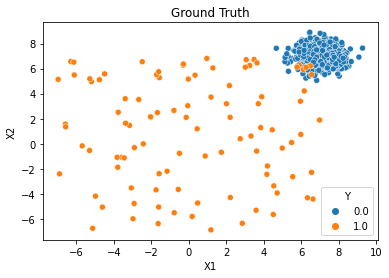

In [9]:
# Data 분포 확인하기 X1, X2
sns.scatterplot(x='X1', y='X2', hue='Y', data=df);
plt.title('Ground Truth')

[Isolation Forest Parameter]
  - package : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html
  - n_estimators : 원하는 기본 estimators 수, default=100
  - max_samples : 하나의 estimator에 들어가는 sample 수(int or float)
      - If int, then draw max_samples samples.
      - If float, then draw max_samples * X.shape[0] samples.
      - If “auto”, then max_samples=min(256, n_samples).
      - default='auto'
  - contamination : 데이터 세트 내 이상치 개수 비율('auto' or float) 
      - default='auto'
  - max_features : estimator의 최대 columns 수(int or float), default=1.0
      - If int, then draw max_features features.
      - If float, then draw max(1, int(max_features * n_features_in_)) features.
      - default=1.0
  - bootstrap : 데이터 중복(bootstrap)할 것인지 여부(boolean), 
      - default=False
      - 이상치가 안 뽑힐 수 있기 때문에 추천하지 않음

In [10]:
# Isolation Forest Setup
IF = IsolationForest(n_estimators = 150, max_samples = 500, contamination = 0.1)
IF.fit(df[['X1', 'X2']])
y_pred = IF.predict(df[['X1', 'X2']])

for i in range(y_pred.shape[0]):
    if y_pred[i] == 1:
        y_pred[i] = 0
    else:
        y_pred[i] = 1

n_errors = (y_pred != df['Y']).sum()

In [11]:
n_errors

12

In [12]:
# Opposite of the anomaly score defined in the original paper.
X_scores = IF.score_samples(df[['X1', 'X2']])

In [13]:
X_scores

array([-0.41760454, -0.359893  , -0.41731235, -0.34984532, -0.38052756,
       -0.35963459, -0.35528454, -0.41170581, -0.37826329, -0.35672562,
       -0.35403409, -0.37552694, -0.38539474, -0.36975603, -0.56924444,
       -0.35541367, -0.35089468, -0.39098447, -0.42595285, -0.39655209,
       -0.39840357, -0.36902185, -0.36175056, -0.36756911, -0.44475022,
       -0.39856618, -0.39307444, -0.38289105, -0.37660806, -0.47999213,
       -0.34961583, -0.39855759, -0.35334644, -0.36711684, -0.4083018 ,
       -0.36525603, -0.39291649, -0.4357805 , -0.4126519 , -0.45067816,
       -0.36906148, -0.34937294, -0.4111937 , -0.352857  , -0.36273279,
       -0.36913876, -0.40081872, -0.42968776, -0.36169838, -0.34885419,
       -0.35859869, -0.36673554, -0.3893579 , -0.36959768, -0.40846651,
       -0.35342413, -0.38557319, -0.3690084 , -0.3910403 , -0.41649288,
       -0.36476791, -0.35798073, -0.51798566, -0.35057188, -0.36305975,
       -0.35217237, -0.46959487, -0.37542749, -0.39941284, -0.38

In [14]:
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())

In [15]:
radius

array([1.73990100e-01, 2.98170043e-02, 1.73260161e-01, 4.71620629e-03,
       8.13655936e-02, 2.91714536e-02, 1.83043023e-02, 1.59254080e-01,
       7.57090716e-02, 2.19043463e-02, 1.51804694e-02, 6.88732027e-02,
       9.35246190e-02, 5.44564899e-02, 5.52811963e-01, 1.86268855e-02,
       7.33769588e-03, 1.07488692e-01, 1.94845575e-01, 1.21397543e-01,
       1.26022858e-01, 5.26224036e-02, 3.44575004e-02, 4.89932175e-02,
       2.41804543e-01, 1.26429093e-01, 1.12709789e-01, 8.72699708e-02,
       7.15740138e-02, 3.29844737e-01, 4.14291783e-03, 1.26407635e-01,
       1.34626075e-02, 4.78633672e-02, 1.50750301e-01, 4.32147445e-02,
       1.12315211e-01, 2.19396677e-01, 1.61617571e-01, 2.56613546e-01,
       5.27213901e-02, 3.53613022e-03, 1.57974746e-01, 1.22399028e-02,
       3.69112774e-02, 5.29144603e-02, 1.32056308e-01, 2.04175998e-01,
       3.43271463e-02, 2.24019112e-03, 2.65835907e-02, 4.69108209e-02,
       1.03425265e-01, 5.40609237e-02, 1.51161773e-01, 1.36566870e-02,
      

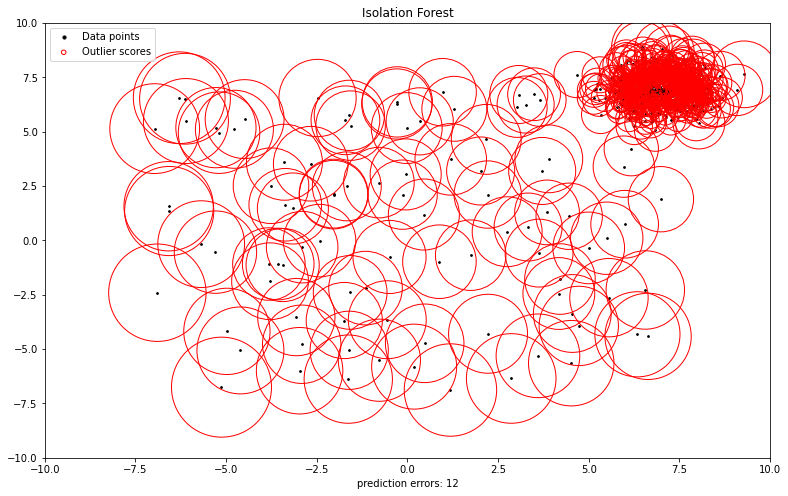

In [16]:
plt.figure(figsize=(13,8))
plt.title("Isolation Forest")
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], color="k", s=3.0, label="Data points")
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(
    df.iloc[:, 0],
    df.iloc[:, 1],
    s=10000 * radius**2,
    edgecolors="r",
    facecolors="none",
    label="Outlier scores",
)
plt.axis("tight")
plt.xlim((-10, 10))
plt.ylim((-10, 10))
plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc="upper left")
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

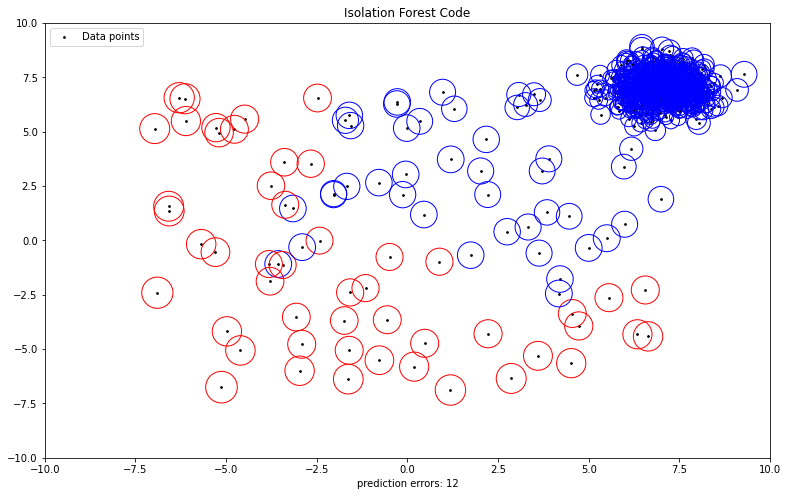

In [18]:
plt.figure(figsize=(13,8))
plt.title("Isolation Forest Code")
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], color="k", s=3.0, label="Data points")
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min()) # MinMax Scale

for i in range(df.shape[0]):
    if radius[i] >= np.percentile(radius, 95):
            plt.scatter(
            df.iloc[i, 0],
            df.iloc[i, 1],
            s=1000 * radius[i],
            edgecolors="r",
            facecolors="none",
            #label="Outlier scores",
        )
    elif radius[i] < np.percentile(radius, 95):
            plt.scatter(
            df.iloc[i, 0],
            df.iloc[i, 1],
            s=1000 * radius[i],
            edgecolors="b",
            facecolors="none",
            #label="Outlier scores",
        )

plt.axis("tight")
plt.xlim((-10, 10))
plt.ylim((-10, 10))
plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc="upper left")
#legend.legendHandles[0]._sizes = [10]
#legend.legendHandles[1]._sizes = [20]
plt.show()

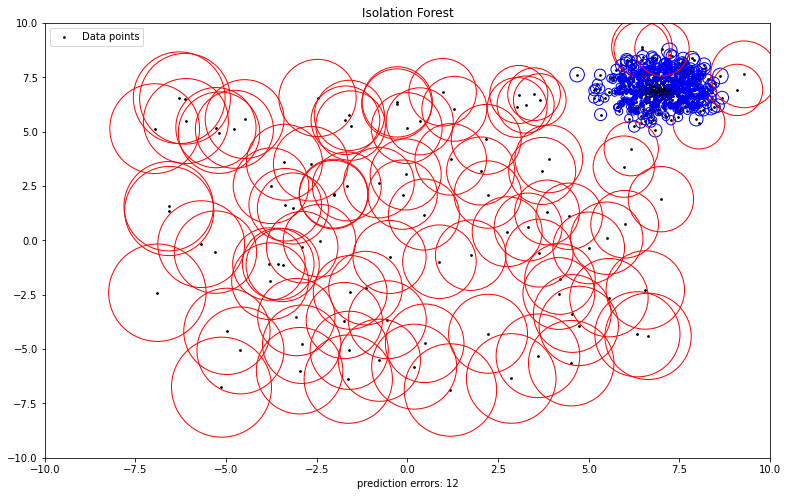

In [19]:
plt.figure(figsize=(13,8))
plt.title("Isolation Forest")
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], color="k", s=3.0, label="Data points")
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min()) # MinMax Scale

for i in range(df.shape[0]):
    if y_pred[i] == 1:
            plt.scatter(
            df.iloc[i, 0],
            df.iloc[i, 1],
            s=10000 * radius[i]**2,
            edgecolors="r",
            facecolors="none",
            #label="Outlier scores",
        )
    elif y_pred[i] == 0:
            plt.scatter(
            df.iloc[i, 0],
            df.iloc[i, 1],
            s=1000 * radius[i]**2,
            edgecolors="b",
            facecolors="none",
            #label="Outlier scores",
        )

plt.axis("tight")
plt.xlim((-10, 10))
plt.ylim((-10, 10))
plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc="upper left")
#legend.legendHandles[0]._sizes = [10]
#legend.legendHandles[1]._sizes = [20]
plt.show()

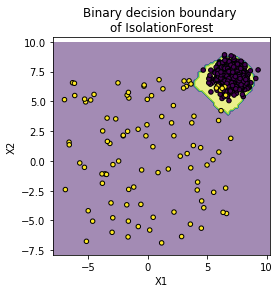

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay

disp = DecisionBoundaryDisplay.from_estimator(
    IF,
    df[['X1','X2']],
    response_method="predict",
    alpha=0.5,
)
disp.ax_.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df.iloc[:, -1], s=20, edgecolor="k")
disp.ax_.set_title("Binary decision boundary \nof IsolationForest")
plt.axis("square")
plt.show()